<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

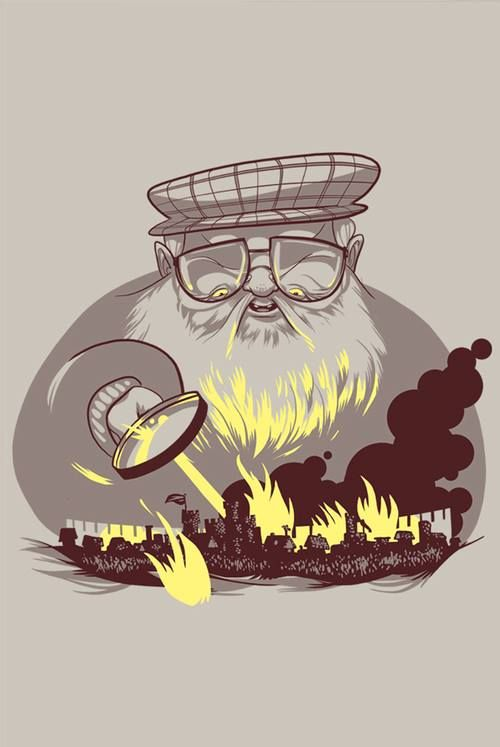

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

Я просто создал у себя папку и туда положил все файлы необходимые для выполнения задания, подключаю я их через pd.read_csv

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
data = pd.read_csv("game_of_thrones_train.csv")

<AxesSubplot:>

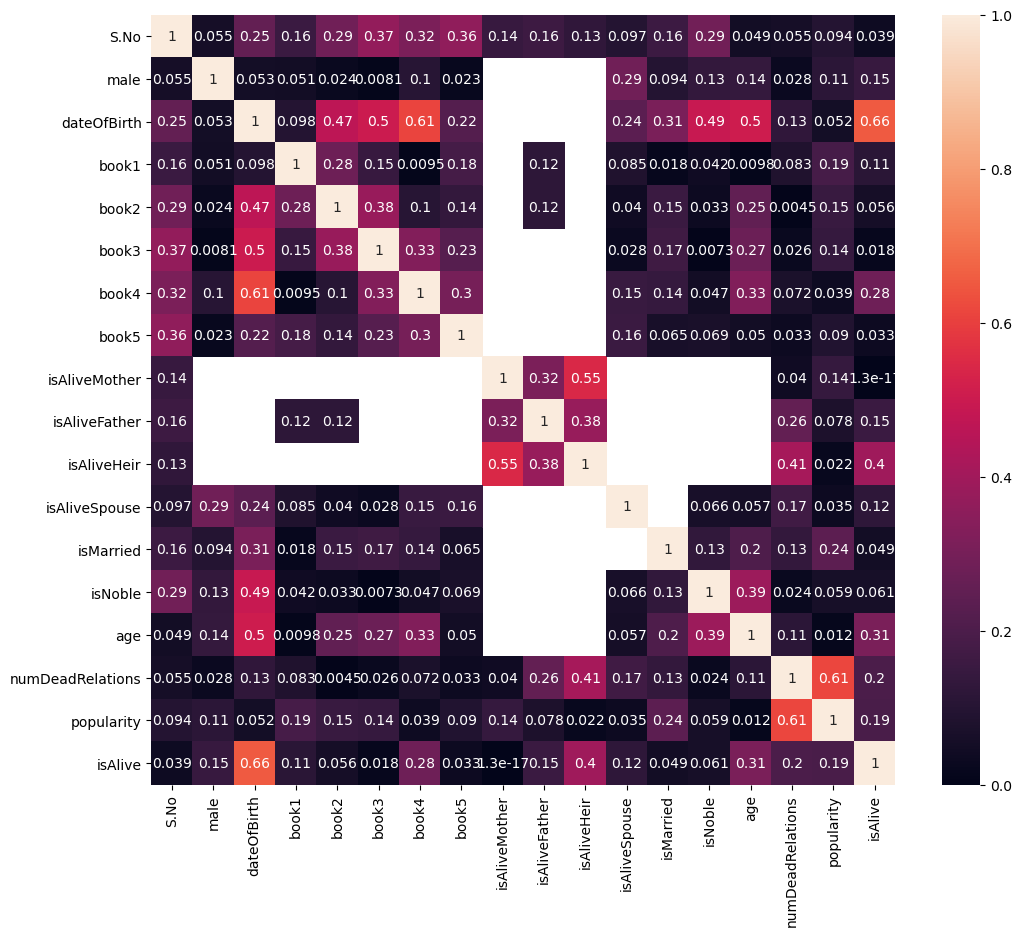

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr().abs(), annot=True)

In [ ]:
data.head()

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [ ]:
data.index = data['S.No']

In [ ]:
data.drop('S.No', axis=1, inplace=True)

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
def percentage_of_nan(df):
    is_nan = df.isna().sum()
    is_nan.sort_values(inplace=True)
    is_nan = is_nan.map(lambda x : x / len(df) * 100)

    print(is_nan)

    plt.figure(figsize=(10,4))
    sns.barplot(x=is_nan.index, y=is_nan.values)
    plt.xticks(rotation=90);

name                 0.000000
numDeadRelations     0.000000
isNoble              0.000000
isMarried            0.000000
book5                0.000000
book4                0.000000
popularity           0.000000
book2                0.000000
book1                0.000000
book3                0.000000
male                 0.000000
isAlive              0.000000
house               24.470135
title               53.949904
culture             68.657675
dateOfBirth         82.080925
age                 82.080925
isAliveSpouse       87.154785
spouse              87.154785
father              98.587026
isAliveFather       98.587026
heir                98.651252
isAliveHeir         98.651252
mother              98.843931
isAliveMother       98.843931
dtype: float64


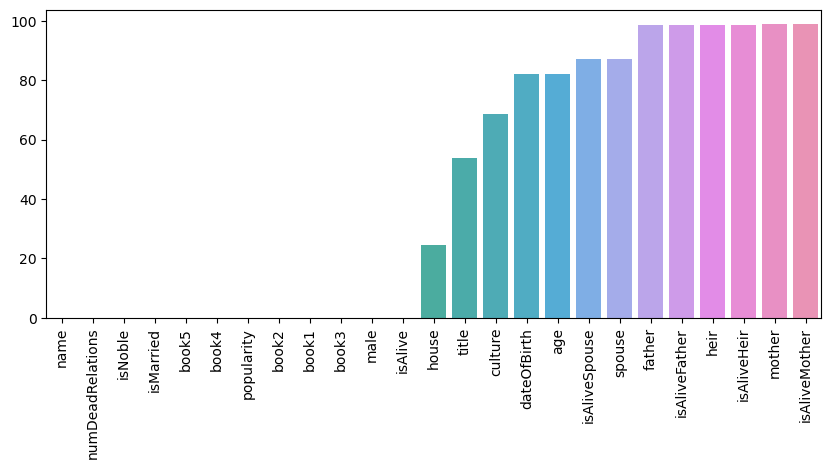

In [ ]:
is_nan = percentage_of_nan(data)

In [ ]:
data.dropna(axis=0, how='all', inplace=True)

In [ ]:
#data.drop(columns=list([is_nan[is_nan > 97]][0].index))
data.drop(columns=['father', 'isAliveFather', 'heir', 'isAliveHeir', 'mother', 'isAliveMother'], inplace=True)

name                 0.000000
numDeadRelations     0.000000
isNoble              0.000000
isMarried            0.000000
book5                0.000000
book4                0.000000
popularity           0.000000
book2                0.000000
book3                0.000000
male                 0.000000
book1                0.000000
isAlive              0.000000
house               24.470135
title               53.949904
culture             68.657675
dateOfBirth         82.080925
age                 82.080925
spouse              87.154785
isAliveSpouse       87.154785
dtype: float64


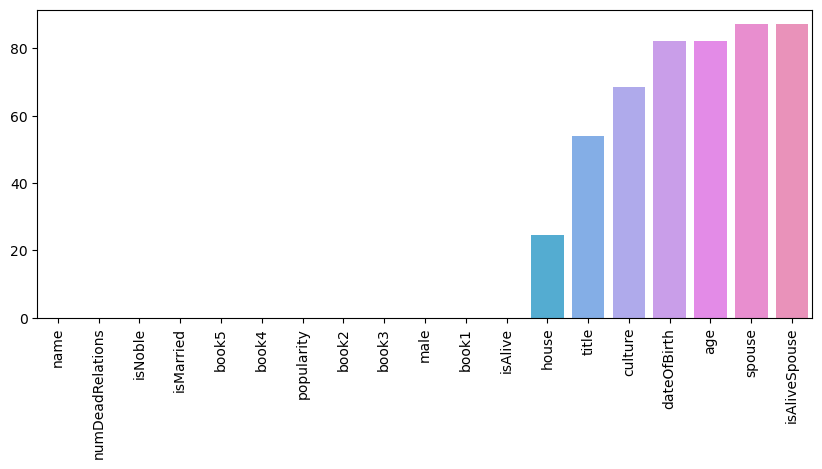

In [ ]:
percentage_of_nan(data)

In [ ]:
data.corr()[['dateOfBirth', 'age','isAliveSpouse']].loc['isAlive']

dateOfBirth      0.655881
age             -0.311115
isAliveSpouse    0.122341
Name: isAlive, dtype: float64

In [ ]:
data.drop('isAliveSpouse', axis=1, inplace=True)

name                 0.000000
numDeadRelations     0.000000
isNoble              0.000000
isMarried            0.000000
book5                0.000000
book4                0.000000
book3                0.000000
popularity           0.000000
book2                0.000000
male                 0.000000
book1                0.000000
isAlive              0.000000
house               24.470135
title               53.949904
culture             68.657675
dateOfBirth         82.080925
age                 82.080925
spouse              87.154785
dtype: float64


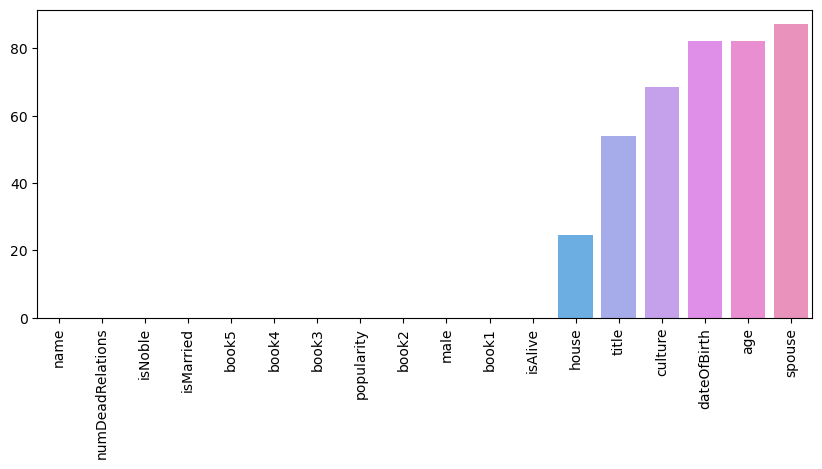

In [ ]:
percentage_of_nan(data)

In [ ]:
df_spouse = pd.get_dummies(data[['isAlive', 'spouse']], columns=['spouse'])

In [ ]:
df_spouse.columns

Index(['isAlive', 'spouse_1st: unknown2nd: unknown3rd: unknown',
       'spouse_Aegon I Targaryen', 'spouse_Aegon II',
       'spouse_Aegon III Targaryen', 'spouse_Aegon IV Targaryen',
       'spouse_Aenys Frey', 'spouse_Aerion Targaryen',
       'spouse_Aerys I Targaryen', 'spouse_Alerie Hightower',
       ...
       'spouse_Viserys I Targaryen', 'spouse_Walder Frey',
       'spouse_Walter Whent', 'spouse_Walton Frey', 'spouse_Whalen Frey',
       'spouse_Wylis Manderly', 'spouse_Wynafrei Whent', 'spouse_Yandry',
       'spouse_Ynys Yronwood', 'spouse_Zhoe Blanetree'],
      dtype='object', length=187)

In [ ]:
df_spouse.corr()['isAlive'].abs().sort_values

<bound method Series.sort_values of isAlive                                        1.000000
spouse_1st: unknown2nd: unknown3rd: unknown    0.047516
spouse_Aegon I Targaryen                       0.047516
spouse_Aegon II                                0.047516
spouse_Aegon III Targaryen                     0.047516
                                                 ...   
spouse_Wylis Manderly                          0.013526
spouse_Wynafrei Whent                          0.013526
spouse_Yandry                                  0.013526
spouse_Ynys Yronwood                           0.013526
spouse_Zhoe Blanetree                          0.047516
Name: isAlive, Length: 187, dtype: float64>

In [ ]:
df_spouse.corr()['isAlive'].mean()

0.0025500133164639022

In [ ]:
data.drop('spouse', axis=1, inplace=True)

name                 0.000000
numDeadRelations     0.000000
isNoble              0.000000
isMarried            0.000000
book5                0.000000
book4                0.000000
popularity           0.000000
book3                0.000000
book1                0.000000
male                 0.000000
book2                0.000000
isAlive              0.000000
house               24.470135
title               53.949904
culture             68.657675
dateOfBirth         82.080925
age                 82.080925
dtype: float64


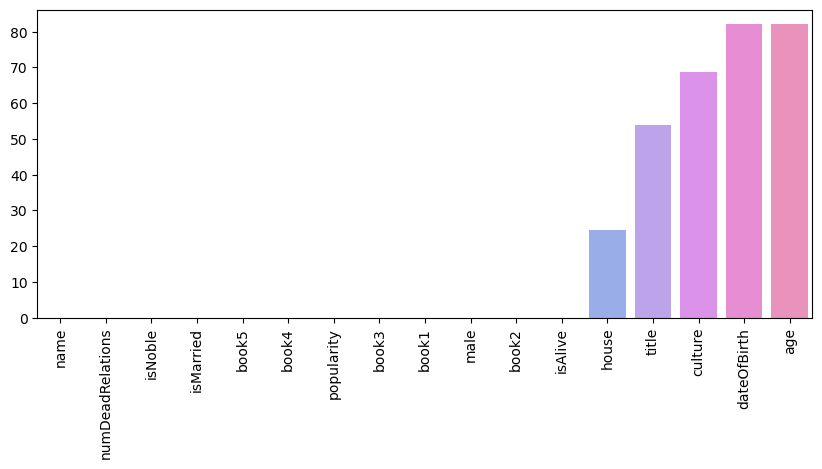

In [ ]:
percentage_of_nan(data)

In [ ]:
data.corr()[['dateOfBirth', 'age']]

,dateOfBirth,age
male,-0.053117,0.140040
dateOfBirth,1.000000,-0.504566
book1,0.097634,-0.009798
book2,0.466285,-0.251196
book3,0.503627,-0.274044
book4,0.612802,-0.325890
book5,0.222051,-0.050203
isMarried,-0.311075,0.204637
isNoble,-0.490445,0.387827
age,-0.504566,1.000000


In [ ]:
data.corr()['dateOfBirth'].sort_values()

age                -0.504566
isNoble            -0.490445
isMarried          -0.311075
numDeadRelations   -0.128644
male               -0.053117
popularity         -0.052242
book1               0.097634
book5               0.222051
book2               0.466285
book3               0.503627
book4               0.612802
isAlive             0.655881
dateOfBirth         1.000000
Name: dateOfBirth, dtype: float64

In [ ]:
d = {}
books = ['book1', 'book2', 'book3', 'book4', 'book5']
for book in books:
    d[book] = round(data.groupby(book).mean().loc[1]['dateOfBirth'])
d = pd.Series(d)

In [ ]:
d

book1    260.0
book2    272.0
book3    270.0
book4    271.0
book5    264.0
dtype: float64

In [ ]:
for book in books:
    data.loc[(data['dateOfBirth'].isna()) & (data[book]), 'dateOfBirth'] = d[book]

In [ ]:
data['dateOfBirth'].fillna(round(data['dateOfBirth'].mean()), inplace=True)

name                 0.000000
numDeadRelations     0.000000
isNoble              0.000000
isMarried            0.000000
book5                0.000000
book4                0.000000
popularity           0.000000
book3                0.000000
book1                0.000000
dateOfBirth          0.000000
male                 0.000000
book2                0.000000
isAlive              0.000000
house               24.470135
title               53.949904
culture             68.657675
age                 82.080925
dtype: float64


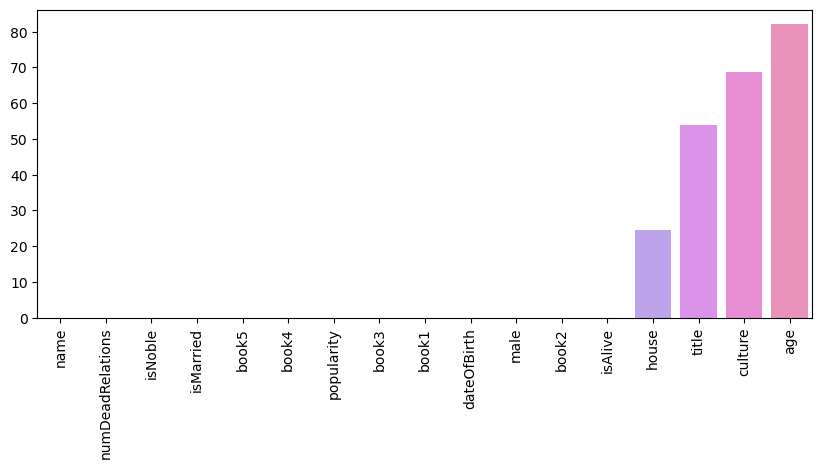

In [ ]:
percentage_of_nan(data)

In [ ]:
data.corr()['age'].sort_values()

dateOfBirth        -0.504566
book4              -0.325890
isAlive            -0.311115
book3              -0.274044
book2              -0.251196
book5              -0.050203
book1              -0.009798
popularity          0.012400
numDeadRelations    0.113640
male                0.140040
isMarried           0.204637
isNoble             0.387827
age                 1.000000
Name: age, dtype: float64

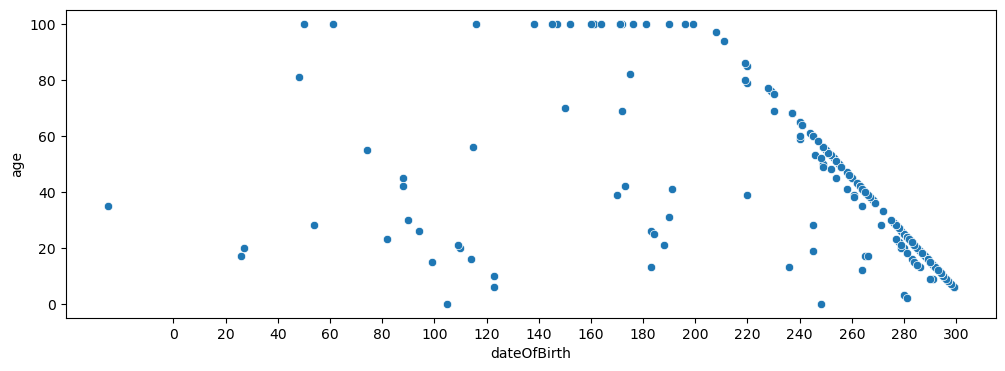

In [ ]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=data, x='dateOfBirth', y='age')
plt.xticks(np.arange(0, 320, 20));

(200.0, 315.2)

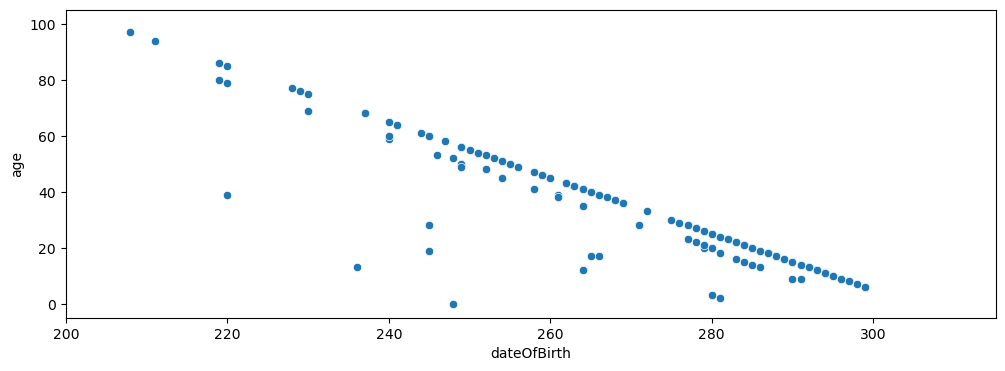

In [ ]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=data, x='dateOfBirth', y='age')
plt.xlim(200, )

In [ ]:
# Из графика видно, что при dateOfBirth > 200 возникает зависимость: чем больше dateOfBirth, тем меньше age

In [ ]:
data.groupby(by='dateOfBirth').mean().loc[-25]

male                 0.000000
book1                1.000000
book2                0.000000
book3                0.000000
book4                0.000000
book5                0.000000
isMarried            1.000000
isNoble              1.000000
age                 35.000000
numDeadRelations     1.000000
popularity           0.277592
isAlive              0.000000
Name: -25.0, dtype: float64

In [ ]:
mean_age = data.groupby(by='dateOfBirth').mean()['age']

In [ ]:
mean_age

dateOfBirth
-25.0      35.0
 26.0      17.0
 27.0      20.0
 48.0      81.0
 50.0     100.0
          ...  
 295.0     10.0
 296.0      9.0
 297.0      8.0
 298.0      7.0
 299.0      6.0
Name: age, Length: 106, dtype: float64

In [ ]:
mean_age[mean_age.isna()]

dateOfBirth
270.0   NaN
Name: age, dtype: float64

In [ ]:
mean_age[262 : 280]

dateOfBirth
262.0    43.000000
263.0    42.000000
264.0    35.166667
265.0    34.250000
266.0    31.666667
267.0    38.000000
268.0    37.000000
269.0    36.000000
270.0          NaN
271.0    28.000000
272.0    33.000000
275.0    30.000000
276.0    29.000000
277.0    26.750000
278.0    25.750000
279.0    22.333333
280.0    19.600000
Name: age, dtype: float64

In [ ]:
round(mean_age[262 : 280].mean())

32.0

In [ ]:
mean_age[270] = round(mean_age[262 : 280].mean())

In [ ]:
mean_age = mean_age.round()

In [ ]:
mean_age.values

array([ 35.,  17.,  20.,  81., 100.,  28., 100.,  55.,  23.,  44.,  30.,
        26.,  15.,   0.,  21.,  20.,  16.,  56., 100.,   8., 100., 100.,
       100.,  70., 100., 100., 100., 100.,  39., 100.,  84.,  42.,  82.,
       100., 100.,  20.,  25.,  21.,  66.,  41., 100., 100.,  97.,  94.,
        83.,  68.,  77.,  76.,  72.,  13.,  68.,  62.,  64.,  61.,  42.,
        53.,  58.,  26.,  54.,  55.,  54.,  50.,  52.,  49.,  50.,  49.,
        44.,  46.,  45.,  38.,  43.,  42.,  35.,  34.,  32.,  38.,  37.,
        36.,  32.,  28.,  33.,  30.,  29.,  27.,  26.,  22.,  20.,  21.,
        23.,  21.,  20.,  19.,  18.,  18.,  17.,  16.,  14.,  13.,  13.,
        12.,  11.,  10.,   9.,   8.,   7.,   6.])

In [ ]:
data['age'].fillna(data['dateOfBirth'].apply(lambda x : mean_age[x]), inplace=True)

name                 0.000000
numDeadRelations     0.000000
age                  0.000000
isNoble              0.000000
isMarried            0.000000
book5                0.000000
book4                0.000000
popularity           0.000000
book3                0.000000
book1                0.000000
dateOfBirth          0.000000
male                 0.000000
book2                0.000000
isAlive              0.000000
house               24.470135
title               53.949904
culture             68.657675
dtype: float64


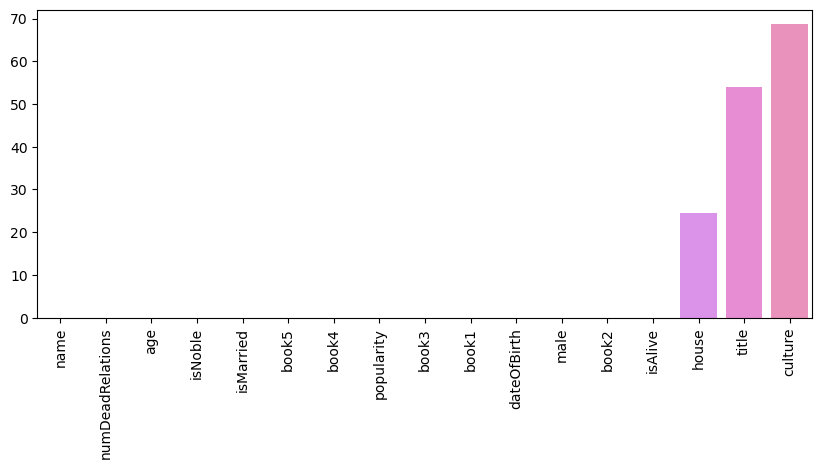

In [ ]:
percentage_of_nan(data)

In [ ]:
data.head()

,name,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,265.0,NaN,0,0,0,0,0,0,0,34.0,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,1,1,1,1,1,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,271.0,House Swyft,0,0,0,1,0,0,1,28.0,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,House Arryn,0,0,0,0,0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,0,0,0,1,0,1,1,29.0,0,0.043478,1


In [ ]:
data['house'].fillna(data['house'].mode()[0], inplace=True)

name                 0.000000
numDeadRelations     0.000000
age                  0.000000
isNoble              0.000000
isMarried            0.000000
book5                0.000000
book4                0.000000
popularity           0.000000
book3                0.000000
book1                0.000000
house                0.000000
dateOfBirth          0.000000
male                 0.000000
book2                0.000000
isAlive              0.000000
title               53.949904
culture             68.657675
dtype: float64


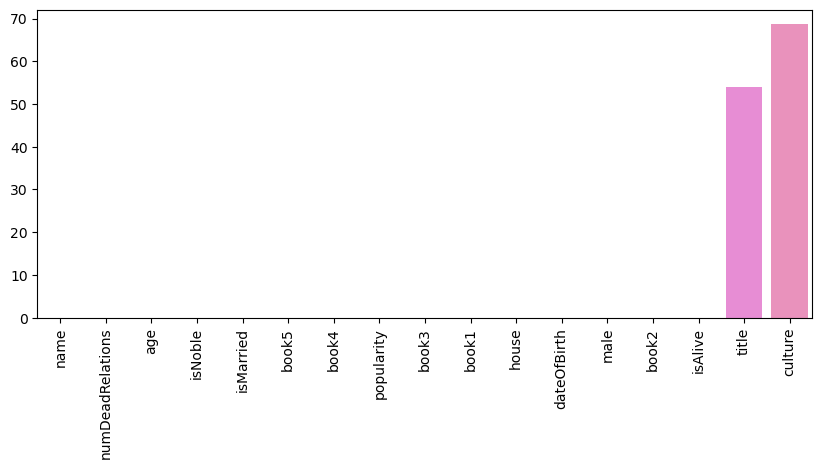

In [ ]:
percentage_of_nan(data)

In [ ]:
top_titles = data['title'].value_counts().index[:6]

In [ ]:
data['title'].fillna(np.random.choice(top_titles), inplace=True)

In [ ]:
top_cultures = data['culture'].value_counts().index[:8]

In [ ]:
data['culture'].fillna(np.random.choice(top_cultures), inplace=True)

name                0.0
numDeadRelations    0.0
age                 0.0
isNoble             0.0
isMarried           0.0
book5               0.0
book4               0.0
popularity          0.0
book3               0.0
book1               0.0
house               0.0
dateOfBirth         0.0
culture             0.0
male                0.0
title               0.0
book2               0.0
isAlive             0.0
dtype: float64


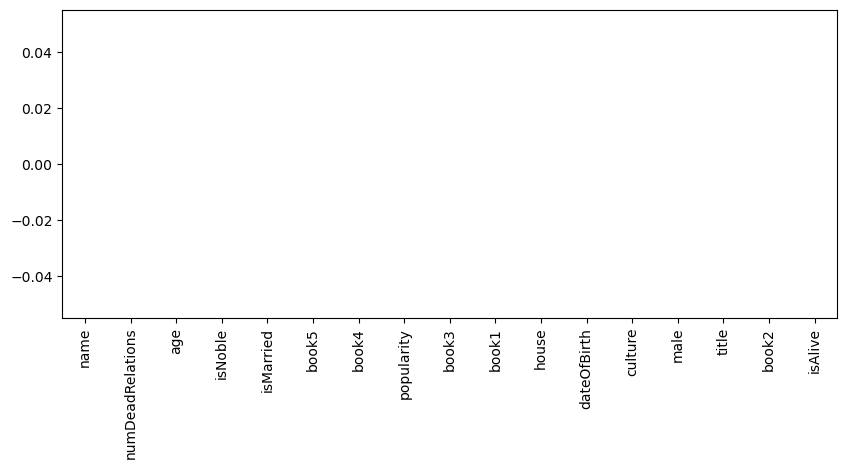

In [ ]:
percentage_of_nan(data)

In [ ]:
data.describe()

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000
mean,0.590880,264.566474,0.138728,0.327553,0.431599,0.562620,0.330122,0.128452,0.439306,33.694284,0.187540,0.062400,0.778420
std,0.491829,27.456724,0.345774,0.469472,0.495458,0.496223,0.470408,0.334700,0.496462,12.064429,1.114648,0.121416,0.415443
min,0.000000,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,265.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.013378,1.000000
50%,1.000000,270.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.023411,1.000000
75%,1.000000,272.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,34.000000,0.000000,0.063545,1.000000
max,1.000000,299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
dict(data['popularity'].value_counts())

{0.0133779264214046: 126,
 0.0167224080267558: 118,
 0.0066889632107023: 113,
 0.0100334448160535: 102,
 0.0033444816053511: 87,
 0.0: 82,
 0.0234113712374581: 82,
 0.020066889632107: 81,
 0.0267558528428093: 69,
 0.0301003344481605: 38,
 0.0434782608695652: 37,
 0.0334448160535117: 36,
 0.0468227424749163: 33,
 0.0367892976588628: 31,
 0.0501672240802675: 29,
 0.040133779264214: 27,
 0.0635451505016722: 24,
 0.060200668896321: 23,
 0.0668896321070234: 20,
 0.0535117056856187: 19,
 0.0735785953177257: 18,
 0.0702341137123745: 17,
 0.0869565217391304: 17,
 0.0568561872909698: 16,
 0.0802675585284281: 16,
 0.0836120401337792: 14,
 0.0769230769230769: 14,
 0.13712374581939699: 12,
 0.130434782608695: 12,
 0.127090301003344: 12,
 0.10033444816053501: 11,
 1.0: 10,
 0.120401337792642: 9,
 0.14381270903010002: 9,
 0.103678929765886: 9,
 0.107023411371237: 9,
 0.160535117056856: 9,
 0.0903010033444816: 8,
 0.0969899665551839: 8,
 0.140468227424749: 8,
 0.163879598662207: 7,
 0.133779264214045

<AxesSubplot:ylabel='popularity'>

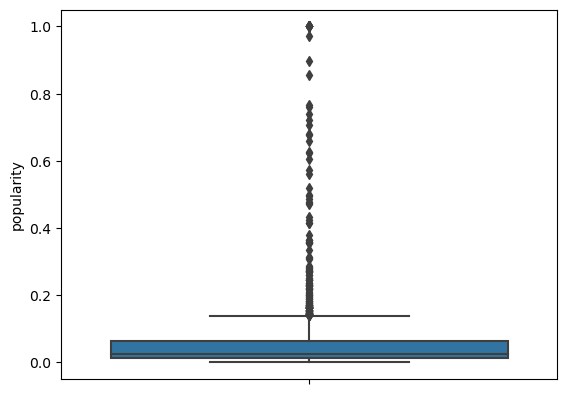

In [ ]:
sns.boxplot(data=data, y='popularity')

In [ ]:
popularity_coef = data['popularity'].quantile(0.95)

In [ ]:
len(data[data['popularity'] > popularity_coef])

78

In [ ]:
data['isPopular'] = data['popularity'].apply(lambda x : 1 if x > popularity_coef else 0)

In [ ]:
data[['isPopular', 'popularity']].head()

,isPopular,popularity
S.No,,
1,1,0.605351
2,1,0.896321
3,1,0.267559
4,0,0.183946
5,0,0.043478


In [ ]:
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x : 1 if x > 0 else 0)

In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [ ]:
def categorize_culture(culture_value):
    for key in cult:
        for value in key:
            if (culture_value == value):
                return key
    return culture_value

In [ ]:
data['culture'].apply(categorize_culture)

S.No
1        Free Folk
2         Rivermen
3        Free Folk
4        Free Folk
5          Dornish
           ...    
1553     Free Folk
1554     Free Folk
1555     Free Folk
1556    Crannogmen
1557     Free Folk
Name: culture, Length: 1557, dtype: object

In [ ]:
data['culture'].unique()

array(['Free Folk', 'Rivermen', 'Dornish', 'Valyrian', 'Ironborn',
       'Northmen', 'Summer Isles', 'Braavosi', 'Dothraki', 'Ghiscari',
       'Vale mountain clans', 'Reach', 'Tyroshi', 'Lhazarene',
       'Free folk', 'Ironmen', 'Qartheen', 'Lysene', 'westermen',
       'Westerman', 'Qarth', 'Lyseni', 'northmen', 'Qohor', 'Westeros',
       'Norvoshi', 'First Men', 'Meereenese', 'Andal', 'Astapori',
       'Westermen', 'ironborn', 'Ghiscaricari', 'Braavos', 'Stormlands',
       'Valemen', 'Myrish', 'Lhazareen', 'Dornishmen', 'Sistermen',
       'Northern mountain clans', 'Andals', 'Vale', 'Crannogmen',
       'Wildling', 'Dorne', 'Pentoshi', 'free folk', 'Summer Islander',
       'Westerlands', 'Summer Islands'], dtype=object)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
data.corr()['isAlive'].abs().sort_values()

book3                0.018427
book5                0.032531
isMarried            0.049381
book2                0.055998
isNoble              0.060572
book1                0.112468
male                 0.148290
boolDeadRelations    0.178177
popularity           0.194187
numDeadRelations     0.198876
isPopular            0.203578
age                  0.212144
book4                0.284014
dateOfBirth          0.346695
isAlive              1.000000
Name: isAlive, dtype: float64

<AxesSubplot:>

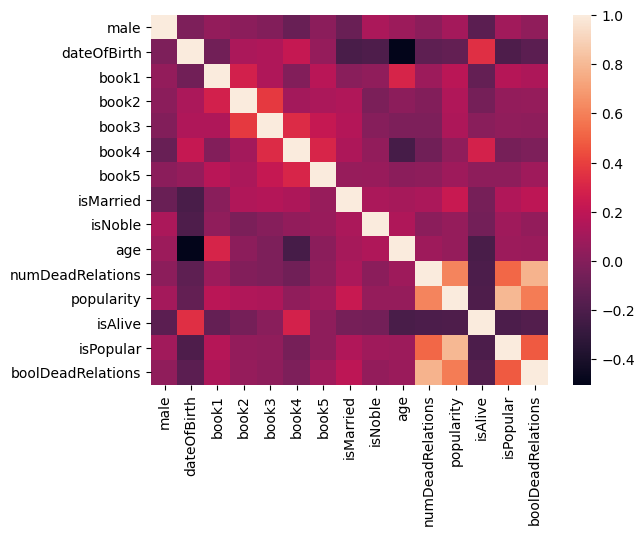

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'house', 'book1',
       'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'age',
       'numDeadRelations', 'popularity', 'isAlive', 'isPopular',
       'boolDeadRelations'],
      dtype='object')

In [ ]:
data_new = data.drop(columns=['name'])

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

<AxesSubplot:xlabel='isAlive', ylabel='count'>

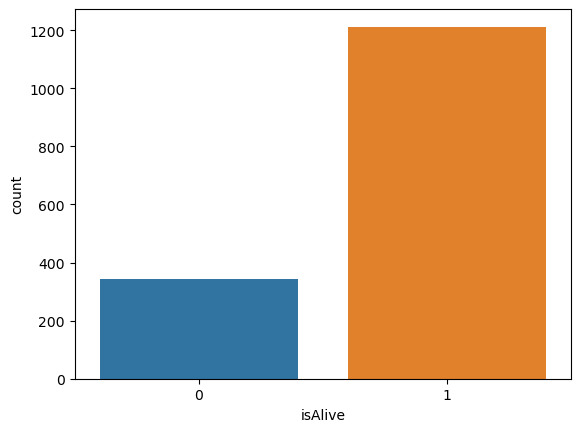

In [ ]:
sns.countplot(data=data, x='isAlive')

In [ ]:
print(len(data[data['isAlive'] == 0]) / len(data['isAlive']))
print(len(data[data['isAlive'] == 1]) / len(data['isAlive']))

0.22157996146435452
0.7784200385356455


In [ ]:
# датасет не сбалансирован по классам

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
data_new = pd.get_dummies(data_new)

<AxesSubplot:>

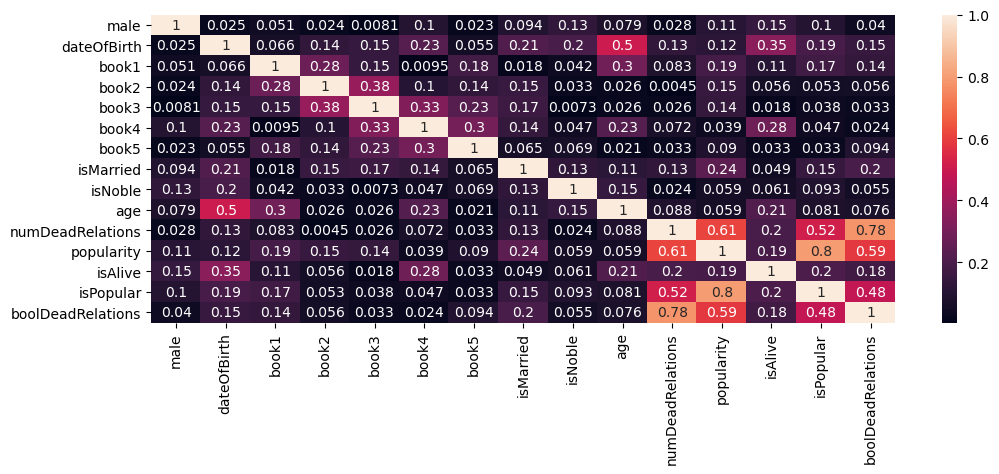

In [ ]:
plt.figure(figsize=(12,4))
sns.heatmap(data.corr().abs(), annot=True)

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
data_new.corr()['isAlive'].abs().sort_values(ascending=False)[:15]

isAlive                  1.000000
dateOfBirth              0.346695
book4                    0.284014
age                      0.212144
isPopular                0.203578
numDeadRelations         0.198876
culture_Valyrian         0.195454
popularity               0.194187
house_House Targaryen    0.187057
boolDeadRelations        0.178177
male                     0.148290
house_Night's Watch      0.123900
book1                    0.112468
title_Prince             0.102842
title_Princess           0.102116
Name: isAlive, dtype: float64

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = data_new.drop('isAlive', axis=1).values
y = data_new['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

## Часть 2. Обучение моделей и их тестирование

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

# В этой части и выполнил обучение моделей, и сделал их оценку!!!

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score
from sklearn.tree import plot_tree

In [ ]:
def model_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(model, X_test, y_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy : %.4f" % accuracy)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

C:\Users\artem\anaconda3\envs\requirements\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\artem\anaconda3\envs\requirements\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\artem\anaconda3\envs\requirements\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\artem\anaconda3\envs\requirements\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\artem\anaconda3\envs\requirements\lib\site-packages\sklearn\linear_

              precision    recall  f1-score   support

           0       0.49      0.64      0.55        44
           1       0.91      0.85      0.88       190

    accuracy                           0.81       234
   macro avg       0.70      0.74      0.72       234
weighted avg       0.83      0.81      0.82       234

Accuracy : 0.8077


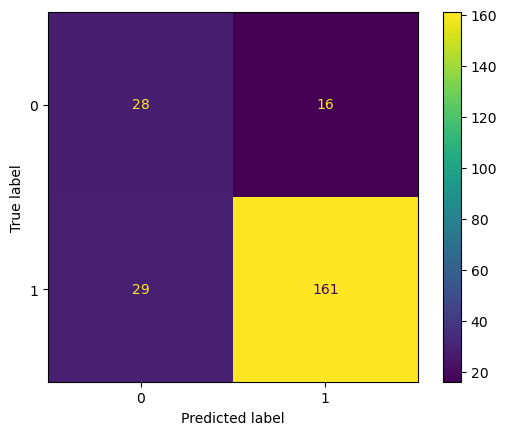

In [ ]:
log_reg = LogisticRegression(class_weight='balanced')

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', log_reg)
])

param_grid = [
    {
        'log_reg__penalty': ['l1', 'l2'],  # Выбор типа регуляризации
        'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Интенсивность регуляризации
        'log_reg__solver': ['liblinear']  # Оптимизатор, поддерживающий L1 и L2
    },
    {
        'log_reg__penalty': ['elasticnet'],
        'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'log_reg__l1_ratio': [0.1, 0.5, 0.9],  # Соотношение L1 и L2
        'log_reg__solver': ['saga']  # Оптимизатор, поддерживающий elasticnet
    }
]

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

model_report(best_model)

In [ ]:
best_model.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=2000, penalty='l1',
                                    solver='liblinear'))])>

              precision    recall  f1-score   support

           0       0.36      0.09      0.15        44
           1       0.82      0.96      0.89       190

    accuracy                           0.80       234
   macro avg       0.59      0.53      0.52       234
weighted avg       0.73      0.80      0.75       234

Accuracy : 0.7991


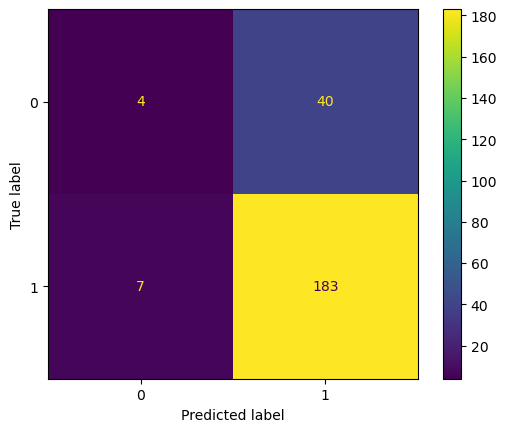

In [ ]:
svc = SVC(class_weight='balanced')

pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', svc)
])

param_grid2 = {
    'svc__C': [0.2, 0.3, 0.4],
    'svc__kernel': ['poly'],
    'svc__degree': [2, 3, 4, 5]
    #'svc__gamma': ['scale', 'auto', 0.1]
}

grid2 = GridSearchCV(pipe2, param_grid2, cv=5, scoring='accuracy')
grid2.fit(X_train, y_train)

best_model2 = grid2.best_estimator_

model_report(best_model2)

In [ ]:
best_model2.named_steps['svc'].degree

2

              precision    recall  f1-score   support

           0       0.69      0.41      0.51        44
           1       0.88      0.96      0.91       190

    accuracy                           0.85       234
   macro avg       0.78      0.68      0.71       234
weighted avg       0.84      0.85      0.84       234

Accuracy : 0.8547


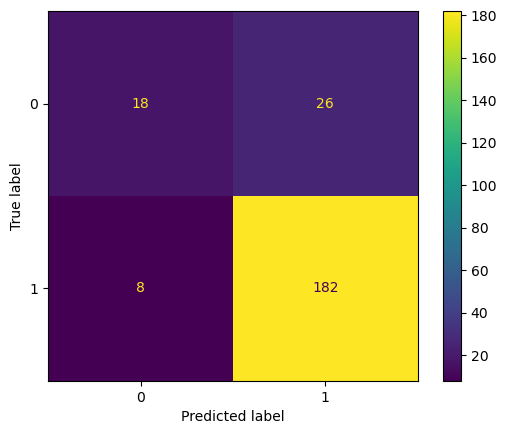

In [ ]:
knn = KNeighborsClassifier()

pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', knn)
])

param_grid3 = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15],  # Различные значения числа соседей
    'knn__weights': ['uniform', 'distance'],        # Различные варианты весов
    'knn__metric': ['euclidean', 'manhattan'],     # Метрики расстояния
    'knn__leaf_size': [20, 30, 40, 50],            # Размер листа для ball_tree и kd_tree
}

grid3 = GridSearchCV(pipe3, param_grid3, cv=5, scoring='accuracy')
grid3.fit(X_train, y_train)

best_model3 = grid3.best_estimator_

model_report(best_model3)

In [ ]:
best_model3.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(leaf_size=20, metric='manhattan',
                                      n_neighbors=9))])>

              precision    recall  f1-score   support

           0       0.14      0.02      0.04        44
           1       0.81      0.97      0.88       190

    accuracy                           0.79       234
   macro avg       0.48      0.50      0.46       234
weighted avg       0.69      0.79      0.72       234

Accuracy : 0.7906


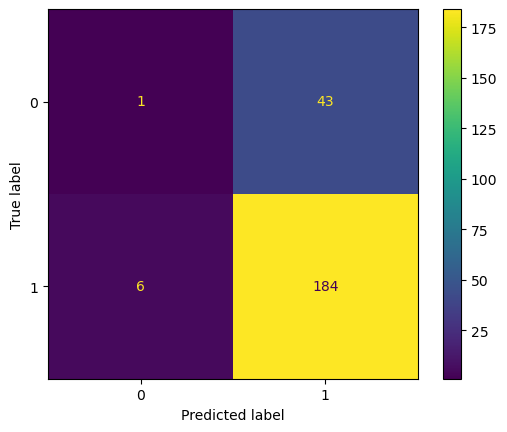

In [ ]:
dtc = DecisionTreeClassifier(class_weight='balanced')

pipe4 = Pipeline([
    ('scaler', StandardScaler()),
    ('dtc', dtc)
])

param_grid4 = {
    'dtc__criterion': ['gini', 'entropy'],                 # Критерии оценки
    'dtc__max_depth': [5, 10, 15, 20],                # Максимальная глубина дерева
    'dtc__min_samples_split': [2, 5, 10],                   # Минимальное количество образцов для разделения
    'dtc__min_samples_leaf': [1, 2, 5, 10],                 # Минимальное количество образцов в листе
    'dtc__max_features': ['sqrt', 'log2'] # Количество признаков для разбиения
}

grid4 = GridSearchCV(pipe4, param_grid4, cv=5, scoring='accuracy')
grid4.fit(X_train, y_train)

best_model4 = grid4.best_estimator_

model_report(best_model4)

In [ ]:
best_model4.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('dtc',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                                        max_features='sqrt',
                                        min_samples_leaf=10,
                                        min_samples_split=5))])>

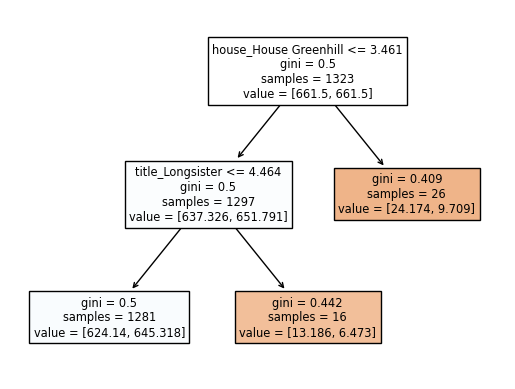

In [ ]:
plot_tree(best_model4.named_steps['dtc'], feature_names=data_new.columns, filled=True);

              precision    recall  f1-score   support

           0       0.69      0.61      0.65        44
           1       0.91      0.94      0.92       190

    accuracy                           0.88       234
   macro avg       0.80      0.78      0.79       234
weighted avg       0.87      0.88      0.87       234

Accuracy : 0.8761


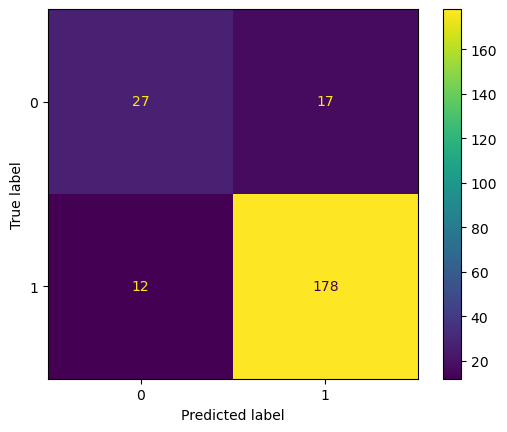

In [ ]:
rfc = RandomForestClassifier(class_weight='balanced', bootstrap=True, max_features='sqrt')

pipe5 = Pipeline([
    ('scaler', StandardScaler()),
    ('rfc', rfc)
])

param_grid5 = {
    'rfc__n_estimators': [100, 150, 200],                   # Количество деревьев
    'rfc__max_depth': [30, 40, 50],                  # Максимальная глубина деревьев
    'rfc__min_samples_split': [2, 3, 4],                  # Минимальное количество образцов для разбиения
}

grid5 = GridSearchCV(pipe5, param_grid5, cv=5, scoring='accuracy')
grid5.fit(X_train, y_train)

best_model5 = grid5.best_estimator_

model_report(best_model5)

In [ ]:
best_model5.named_steps['rfc'].get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(class_weight='balanced', max_depth=30,
                       max_features='sqrt', n_estimators=200)>

              precision    recall  f1-score   support

           0       0.47      0.39      0.42        44
           1       0.86      0.90      0.88       190

    accuracy                           0.80       234
   macro avg       0.67      0.64      0.65       234
weighted avg       0.79      0.80      0.80       234

Accuracy : 0.8034


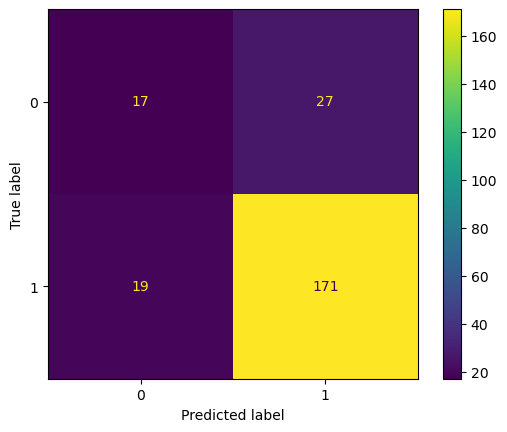

In [ ]:
from sklearn.gaussian_process.kernels import RBF, Matern

gpc = GaussianProcessClassifier()

pipe6 = Pipeline([
    ('scaler', StandardScaler()),
    ('gpc', gpc)
])

pipe6.fit(X_train, y_train)

best_model6 = pipe6

model_report(best_model6)

              precision    recall  f1-score   support

           0       0.47      0.39      0.42        44
           1       0.86      0.90      0.88       190

    accuracy                           0.80       234
   macro avg       0.67      0.64      0.65       234
weighted avg       0.79      0.80      0.80       234

Accuracy : 0.8034


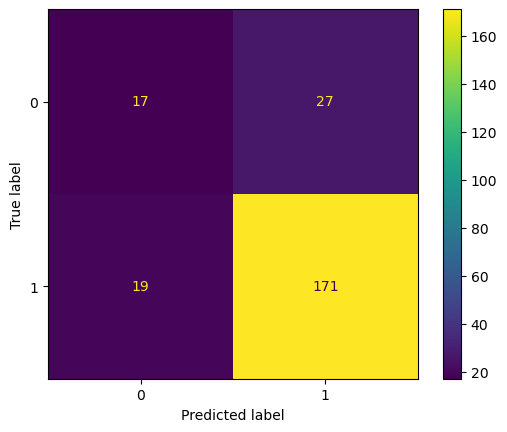

In [ ]:
gNB = GaussianNB()

pipe7 = Pipeline([
    ('scaler', StandardScaler()),
    ('gpc', gpc)
])

pipe7.fit(X_train, y_train)

best_model7 = pipe7

model_report(best_model7)

              precision    recall  f1-score   support

           0       0.86      0.27      0.41        44
           1       0.85      0.99      0.92       190

    accuracy                           0.85       234
   macro avg       0.86      0.63      0.67       234
weighted avg       0.86      0.85      0.82       234

Accuracy : 0.8547


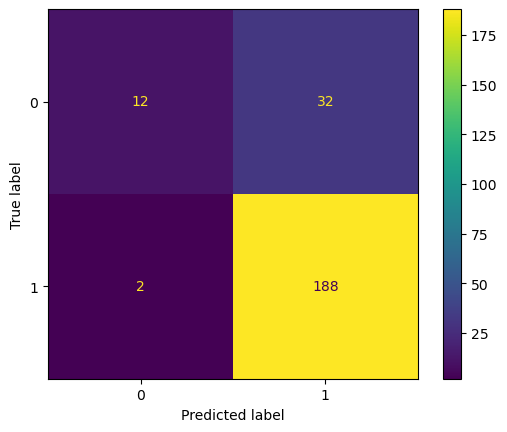

In [ ]:
abc = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.1)

param_grid8 = {
    'n_estimators': [30, 40, 50],  # Количество деревьев (слабых классификаторов)
}

grid8 = GridSearchCV(abc, param_grid8, cv=5, scoring='accuracy')
grid8.fit(X_train, y_train)

best_model8 = grid8.best_estimator_

model_report(best_model8)

In [ ]:
best_model8.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
final_model = best_model8

## Часть 3. Обработка данных из тренировочной выборки

Проделываем с файлом game_of_thrones_test.csv действия, аналогичные дейтсвиям, которые мы проделывали с game_of_thrones_train.csv

In [ ]:
data_test = pd.read_csv("game_of_thrones_test.csv")

S.No                 0.000000
isNoble              0.000000
isMarried            0.000000
book5                0.000000
book4                0.000000
book3                0.000000
numDeadRelations     0.000000
book1                0.000000
book2                0.000000
male                 0.000000
name                 0.000000
popularity           0.000000
house               11.825193
title               43.187661
culture             51.413882
dateOfBirth         60.411311
age                 60.411311
spouse              80.462725
isAliveSpouse       80.462725
father              98.971722
isAliveFather       98.971722
mother              99.228792
isAliveMother       99.228792
isAliveHeir         99.485861
heir                99.485861
dtype: float64


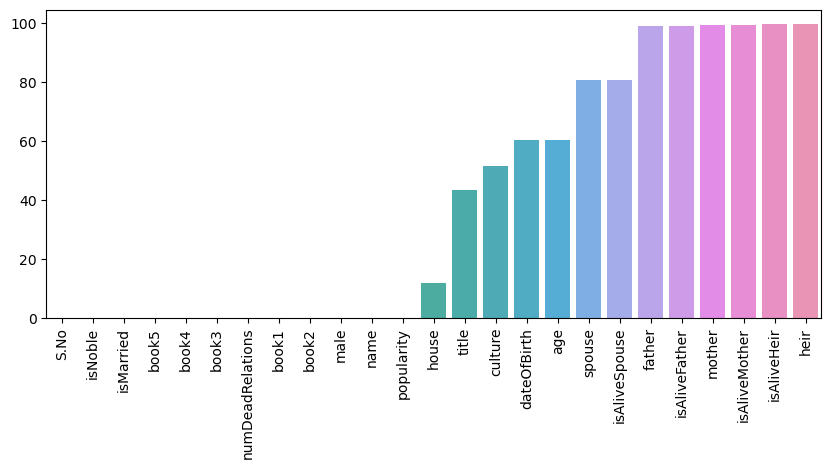

In [ ]:
percentage_of_nan(data_test)

In [ ]:
data_test.columns

Index(['S.No', 'name', 'title', 'male', 'culture', 'dateOfBirth', 'mother',
       'father', 'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4',
       'book5', 'isAliveMother', 'isAliveFather', 'isAliveHeir',
       'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations',
       'popularity'],
      dtype='object')

In [ ]:
data_new.columns

Index(['male', 'dateOfBirth', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'age',
       ...
       'house_R'hllor', 'house_Sea watch', 'house_Second Sons',
       'house_Stone Crows', 'house_Stormcrows', 'house_Summer Islands',
       'house_The Citadel', 'house_Windblown', 'house_Wise Masters',
       'house_wildling'],
      dtype='object', length=576)

In [ ]:
data_test.index = data_test['S.No']

In [ ]:
data_test

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100


In [ ]:
data_test.drop('S.No', axis=1, inplace=True)

In [ ]:
data_test.drop(columns=['father', 'isAliveFather', 'heir', 'isAliveHeir', 'mother', 'isAliveMother', 'isAliveSpouse', 'spouse'], inplace=True)

In [ ]:
data_test.groupby('book1').mean()

,male,dateOfBirth,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity
book1,,,,,,,,,,,
0,0.707763,229.285714,0.310502,0.525114,0.621005,0.543379,0.132420,0.474886,41.428571,0.315068,0.127029
1,0.764706,7117.642857,0.888235,0.870588,0.823529,0.800000,0.276471,0.641176,-6819.750000,1.376471,0.290321


In [ ]:
tmp = data_test['dateOfBirth'].unique()
func = np.vectorize(lambda x: f"{x:.6f}")
func(tmp)

array(['156.000000', 'nan', '262.000000', '288.000000', '299.000000',
       '279.000000', '290.000000', '274.000000', '257.000000',
       '287.000000', '228.000000', '281.000000', '286.000000',
       '273.000000', '216.000000', '282.000000', '184.000000',
       '114.000000', '269.000000', '149.000000', '275.000000',
       '155.000000', '236.000000', '267.000000', '276.000000',
       '175.000000', '242.000000', '53.000000', '82.000000', '170.000000',
       '81.000000', '284.000000', '244.000000', '260.000000',
       '278279.000000', '291.000000', '263.000000', '285.000000',
       '256.000000', '125.000000', '265.000000', '217.000000',
       '231.000000', '245.000000', '277.000000', '255.000000',
       '270.000000', '278.000000', '295.000000', '271.000000',
       '283.000000', '237.000000', '266.000000', '91.000000',
       '264.000000', '239.000000', '247.000000', '113.000000',
       '289.000000', '292.000000', '252.000000', '254.000000',
       '246.000000', '178.000000', 

<AxesSubplot:ylabel='dateOfBirth'>

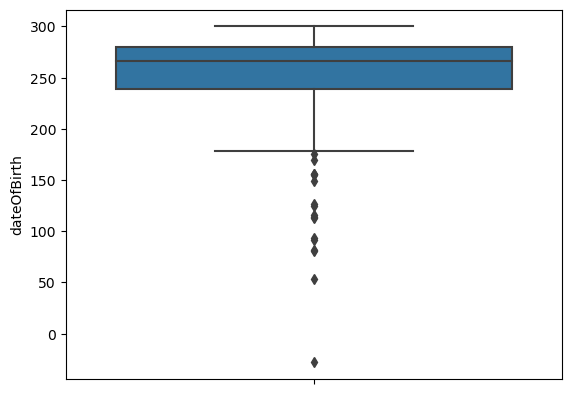

In [ ]:
sns.boxplot(data=data_test[data_test['age']>0], y='dateOfBirth')

In [ ]:
data_test[data_test['dateOfBirth'] > data_test['dateOfBirth'].quantile(0.75)]

,name,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,
1564,Missandei,NaN,0,Naathi,288.0,House Targaryen,0,0,1,1,1,0,0,17.0,0,0.173913
1566,Monster,NaN,0,Free Folk,299.0,NaN,0,0,1,1,1,0,0,6.0,0,0.076923
1574,Myrcella Baratheon,Princess,0,NaN,290.0,House Baratheon of King's Landing,1,1,1,1,1,0,1,15.0,5,0.561873
1580,Obella Sand,NaN,0,Dornishmen,287.0,House Martell,0,0,1,1,1,0,0,18.0,1,0.103679
1595,Petyr Frey,NaN,1,NaN,281.0,House Frey,0,1,1,1,0,1,0,19.0,0,0.177258
1597,Podrick Payne,NaN,1,NaN,286.0,House Payne,1,1,1,1,1,0,0,19.0,0,0.290970
1605,Quentyn Martell,Ser,1,Dornishmen,281.0,House Martell,1,1,1,1,1,0,1,19.0,0,0.551839
1607,Ramsay Snow,Lord of the Hornwood,1,Northmen,282.0,House Bolton of the Dreadfort,0,1,1,1,1,1,1,23.0,1,0.461538
1626,Alayaya,NaN,0,NaN,282.0,Chataya's brothel,0,1,1,1,1,0,0,23.0,0,0.076923


(0.0, 110.0)

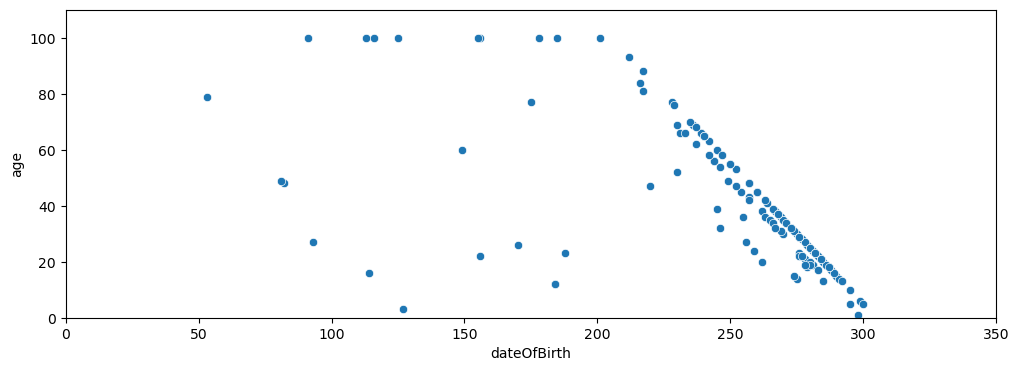

In [ ]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=data_test, x='dateOfBirth', y='age')
#plt.xticks(np.arange(0, 320, 20));
plt.xlim(0, 350)
plt.ylim(0, 110)

In [ ]:
d = {}
books = ['book1', 'book2', 'book3', 'book4', 'book5']
for book in books:
    d[book] = round(data_test[data_test['age'] > 0].groupby(book).mean().loc[1]['dateOfBirth'])
d = pd.Series(d)

In [ ]:
for book in books:
    data_test.loc[(data_test['dateOfBirth'].isna()) & (data_test[book]), 'dateOfBirth'] = d[book]

In [ ]:
data_test['dateOfBirth'].fillna(round(data_test['dateOfBirth'].mean()), inplace=True)

In [ ]:
mean_age = data_test.groupby(by='dateOfBirth').mean()['age']

In [ ]:
mean_age = mean_age.round()

In [ ]:
mean_age[mean_age.isna()]

dateOfBirth
261.0    NaN
1824.0   NaN
Name: age, dtype: float64

In [ ]:
mean_age[261] = mean_age[250:270].mean()

In [ ]:
mean_age[1824] = mean_age[mean_age > 0].mean()

In [ ]:
data_test['age'].fillna(data_test['dateOfBirth'].apply(lambda x : mean_age[x]), inplace=True)

In [ ]:
#data_test['dateOfBirth'].apply(lambda x: f"{x:.6f}").values

In [ ]:
data_test['house'].fillna(data_test['house'].mode()[0], inplace=True)

In [ ]:
top_titles = data_test['title'].value_counts().index[:3]

In [ ]:
data_test['title'].fillna(np.random.choice(top_titles), inplace=True)

In [ ]:
top_cultures = data_test['culture'].value_counts().index[:9]

In [ ]:
data_test['culture'].fillna(np.random.choice(top_cultures), inplace=True)

name                0.0
title               0.0
male                0.0
culture             0.0
dateOfBirth         0.0
house               0.0
book1               0.0
book2               0.0
book3               0.0
book4               0.0
book5               0.0
isMarried           0.0
isNoble             0.0
age                 0.0
numDeadRelations    0.0
popularity          0.0
dtype: float64


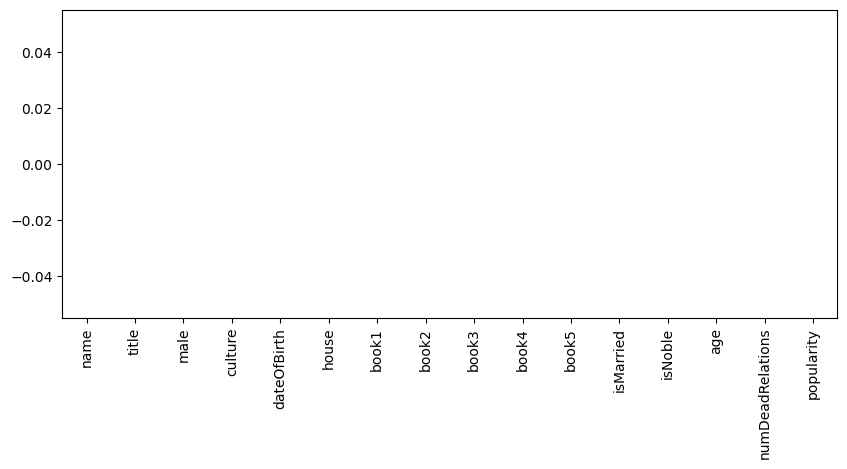

In [ ]:
percentage_of_nan(data_test)

In [ ]:
popularity_coef = data_test['popularity'].quantile(0.80)

In [ ]:
len(data_test[data_test['popularity'] > popularity_coef])

78

In [ ]:
data_test['isPopular'] = data_test['popularity'].apply(lambda x : 1 if x > popularity_coef else 0)

In [ ]:
data_test['boolDeadRelations'] = data_test['numDeadRelations'].apply(lambda x : 1 if x > 0 else 0)

In [ ]:
data_test['culture'].apply(categorize_culture)

S.No
1558      Valyrian
1559        Asshai
1560      Valyrian
1561      Valyrian
1562    Riverlands
           ...    
1942      Westeros
1943      Valyrian
1944      Valyrian
1945      Valyrian
1946      Valyrian
Name: culture, Length: 389, dtype: object

In [ ]:
data_test = data_test.drop(columns=['name'])

In [ ]:
data_test = pd.get_dummies(data_test)

In [ ]:
len(data_test.columns)

308

In [ ]:
len(data_new.columns)

576

In [ ]:
# Определяем общие колонки
common_columns = data_new.columns.intersection(data_test.columns)

# Создаем датафреймы, содержащие только общие колонки
data_new_common = data_new[common_columns]
data_test_common = data_test[common_columns]

# Теперь data_new_common и data_test_common содержат только общие колонки


In [ ]:
len(data_new_common.columns)

196

In [ ]:
len(data_test_common.columns)

196

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

Я просто создал у себя папку и туда положил все файлы необходимые для выполнения задания, подключаю я их через pd.read_csv

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
X_new = data_new_common.values
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.10, random_state=101)
# Заново разбил данные на тестовые и тренрировочные, потому что преобразовал data в data_new_commmon

In [ ]:
X_holdout = data_test_common.values
# Здесь содержятся данные, на основе которых я сдлеаю прогноз, который запишу в new_submission.csv

In [ ]:
final_model = RandomForestClassifier(class_weight='balanced_subsample')

final_pipe = Pipeline([
    ('final_model', final_model)
])

final_param_grid = {
    'final_model__n_estimators': [100, 200, 300, 500],
    'final_model__max_depth': [None, 10, 20, 30, 40],
    'final_model__min_samples_split': [2, 5, 10],
    'final_model__min_samples_leaf': [1, 2, 4],
    'final_model__bootstrap': [True],
    'final_model__max_features': ['sqrt', 'log2']
}

final_grid = GridSearchCV(final_pipe, final_param_grid, cv=5, scoring='accuracy')
final_grid.fit(X_train_new, y_train_new)

final_model = final_grid.best_estimator_

# Я посчитал модель RandomForestClassifier самой лучшей, поэтому завново её тренирую, так как тренировочный данные изменились data_new -> data_new_common

In [ ]:
final_model.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('final_model',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=30, max_features='sqrt',
                                        min_samples_split=5,
                                        n_estimators=500))])>

              precision    recall  f1-score   support

           0       0.72      0.62      0.67        34
           1       0.90      0.93      0.92       122

    accuracy                           0.87       156
   macro avg       0.81      0.78      0.79       156
weighted avg       0.86      0.87      0.86       156



array([0.84615385, 0.85897436, 0.82051282, 0.78846154, 0.82692308,
       0.81410256, 0.8525641 , 0.83225806, 0.83870968, 0.75483871])

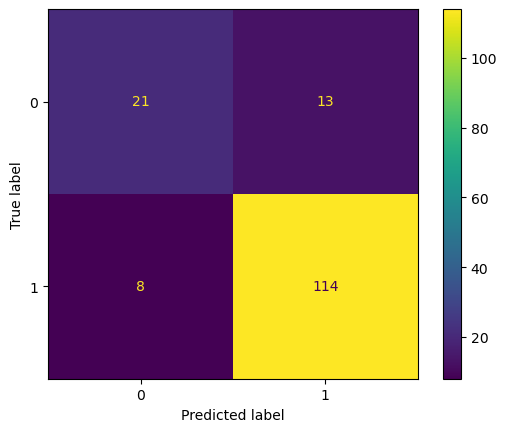

In [ ]:
predict = final_model.predict(X_test_new)
plot_confusion_matrix(final_model, X_test_new, y_test_new)
print(classification_report(y_test_new, predict))
cross_val_score(final_model, X_new, y, scoring='accuracy', cv=10)
# Делаем оценку работы модели

In [ ]:
final_predict = final_model.predict(X_holdout)
# Делаем прогноз для тестовых данных

In [ ]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [ ]:
submission['isAlive'] = final_predict

In [ ]:
len(submission[submission['isAlive'] == 0])/ 389 * 100
# Процент прогнозов "0"

32.64781491002571

In [ ]:
len(submission[submission['isAlive'] == 1])/ 389 * 100
# Процент прогнозов "1"

67.3521850899743

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("new_submission.csv", index=False)